In [25]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

# 1-Qubit-Quantum-Zufallsgenerator
qc = QuantumCircuit(1, 1)      # Ein Qubit, ein klassisches Bit
qc.h(0)                        # Hadamard-Gatter -> Superposition
qc.measure(0, 0)               # Messung in Z-Basis

# Simulation
simulator = FakeAlmadenV2()
shots = 10
job = simulator.run(qc, shots=shots)  # Nur zehn Schuss für ein Zufallsbit
result = job.result()
counts = result.get_counts()

# Extraktion der Bits
random_bits = []
for bitstring in counts:
        random_bits.extend([int(b) for b in bitstring] * counts[bitstring])

print("Zufallsbits:", random_bits)


Zufallsbits: [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


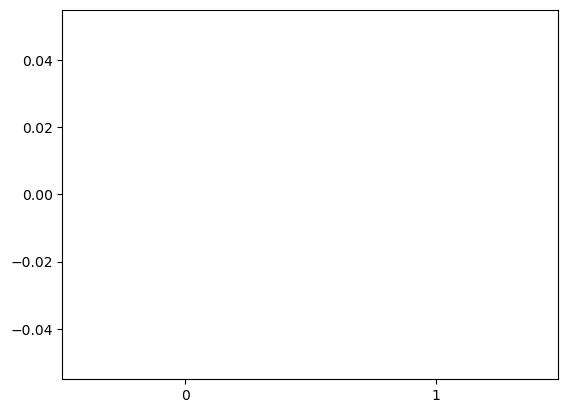

In [85]:
from matplotlib import pyplot as plt
counter0 = random_bits.count(0)
counter1 = random_bits.count(1)
counter = [counter0, counter1]
    
names = ["0", "1"]
plt.bar(names, counter)
plt.show()

In [103]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
simulator = FakeAlmadenV2()
shots = 5000

# 1-Qubit-Quantum-Zufallsgenerator
qc = QuantumCircuit(1, 1)      # Ein Qubit, ein klassisches Bit
qc.h(0)                        # Hadamard-Gatter -> Superposition
qc.measure(0, 0) 

gesamt_counter0 = 0
gesamt_counter1 = 0

for i in range(0, 10000):
    job = simulator.run(qc, shots=shots)  # Nur zehn Schuss für ein Zufallsbit
    result = job.result()
    counts = result.get_counts()
    for bitstring, anzahl in counts.items():
        for bit in bitstring:
            if bit == '0':
                gesamt_counter0 += anzahl
            elif bit == '1':
                gesamt_counter1 += anzahl

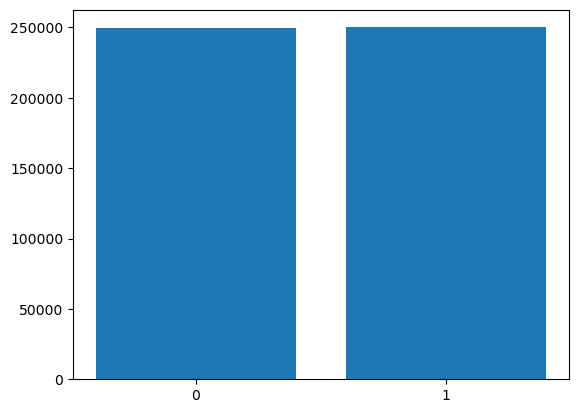

[249913, 250087]


In [104]:
from matplotlib import pyplot as plt
names = ["0", "1"]
counte = [gesamt_counter0, gesamt_counter1]
plt.bar(names, counte)
plt.show()
print(counte)

Simuliere Quantenschaltkreise: 100%|██████████| 10000/10000 [00:41<00:00, 240.48it/s]


Ergebnisse:
Anzahl '0'-Bits: 24998435
Anzahl '1'-Bits: 25001565
Gesamtausführungszeit: 41.59 Sekunden
Zeit pro Iteration: 0.0042 Sekunden


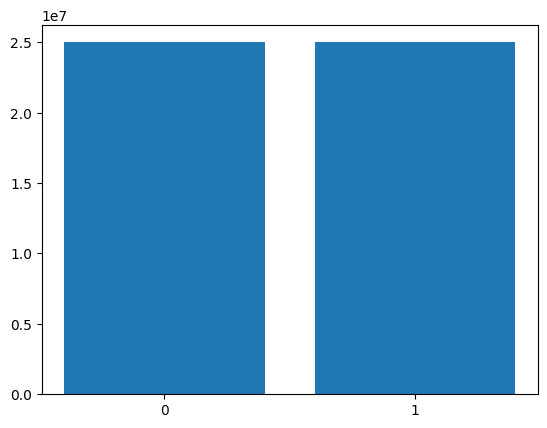

[24998435, 25001565]


In [11]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
import time
from tqdm import tqdm  # Für Fortschrittsbalken (pip install tqdm)

# Initialisierung
simulator = FakeAlmadenV2()
shots = 5000
gesamt_counter0 = 0
gesamt_counter1 = 0

# Stoppuhr starten
start_time = time.time()

# Hauptschleife mit Fortschrittsbalken
for i in tqdm(range(10000), desc="Simuliere Quantenschaltkreise"):
    job = simulator.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    for bitstring, anzahl in counts.items():
        # Effizientere Zählung der 0/1-Bits
        gesamt_counter0 += bitstring.count('0') * anzahl
        gesamt_counter1 += bitstring.count('1') * anzahl

# Stoppuhr stoppen
end_time = time.time()
execution_time = end_time - start_time

# Ergebnisse ausgeben
print("\nErgebnisse:")
print(f"Anzahl '0'-Bits: {gesamt_counter0}")
print(f"Anzahl '1'-Bits: {gesamt_counter1}")
print(f"Gesamtausführungszeit: {execution_time:.2f} Sekunden")
print(f"Zeit pro Iteration: {(execution_time / 10000):.4f} Sekunden")

names = ["0", "1"]
counte = [gesamt_counter0, gesamt_counter1]
plt.bar(names, counte)
plt.show()
print(counte)